In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

### Model Testing

Number of faces detected: 1


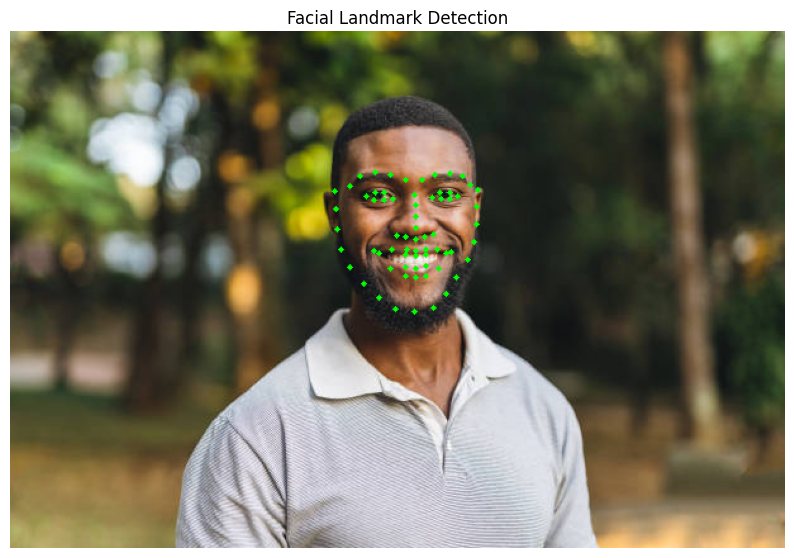

In [4]:
# Paths
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
IMAGE_PATH = "./img.png"

# Initialize dlib's face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)

# Load the image
image = cv2.imread(IMAGE_PATH)
if image is None:
    print(f"Image not found at {IMAGE_PATH}")
    exit()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = detector(gray)
print(f"Number of faces detected: {len(faces)}")

# Loop through each face detected
for face in faces:
    # Predict facial landmarks
    landmarks = predictor(gray, face)

    # Loop through each landmark point
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        # Draw a circle at each landmark point
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Convert image from BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.title("Facial Landmark Detection")
plt.axis('off')  # Hide axis
plt.show()


### Live Camera

In [5]:
# Paths
PREDICTOR_PATH = "./shape_predictor_68_face_landmarks.dat"

# Initialize dlib's face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)

# Initialize video capture (0 for default webcam)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = detector(gray)

    # Loop through each face detected
    for face in faces:
        # Predict facial landmarks
        landmarks = predictor(gray, face)

        # Loop through each landmark point
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            # Draw a circle at each landmark point
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

    # Display the resulting frame
    cv2.imshow('Real-Time Facial Landmark Detection', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


### Identifying Nose and Eyes Midpoint

Number of faces detected: 1
Nose Tip: (320, 155)
Left Eye Center: [291 130]
Right Eye Center: [343 129]
Eyes Midpoint: (317, 129)


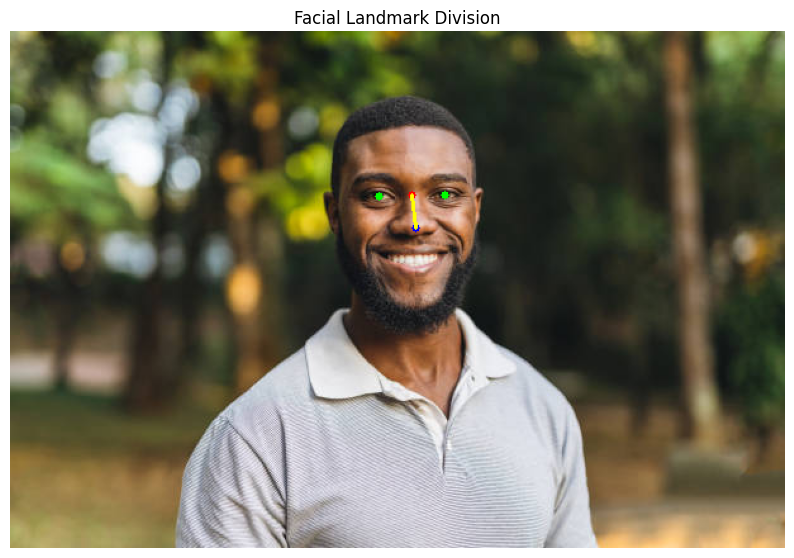

In [6]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Paths
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
IMAGE_PATH = "./img.png"

# Initialize Dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)

# Load the image
image = cv2.imread(IMAGE_PATH)
if image is None:
    raise ValueError(f"Image not found at {IMAGE_PATH}")

# Create a copy for output
output_image = image.copy()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = detector(gray)

print(f"Number of faces detected: {len(faces)}")

for face in faces:
    # Predict landmarks
    landmarks = predictor(gray, face)

    # Nose Tip: Point 30
    nose_tip = (landmarks.part(30).x, landmarks.part(30).y)

    # Left Eye: Points 36-41
    left_eye_points = []
    for n in range(36, 42):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        left_eye_points.append((x, y))

    # Right Eye: Points 42-47
    right_eye_points = []
    for n in range(42, 48):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        right_eye_points.append((x, y))

    # Calculate the center (midpoint) of each eye
    left_eye_center = np.mean(left_eye_points, axis=0).astype(int)
    right_eye_center = np.mean(right_eye_points, axis=0).astype(int)

    # Calculate the midpoint between the two eyes
    eyes_midpoint = (
        (left_eye_center[0] + right_eye_center[0]) // 2,
        (left_eye_center[1] + right_eye_center[1]) // 2
    )

    print(f"Nose Tip: {nose_tip}")
    print(f"Left Eye Center: {left_eye_center}")
    print(f"Right Eye Center: {right_eye_center}")
    print(f"Eyes Midpoint: {eyes_midpoint}")

    # Draw landmarks for visualization (optional)
    # Draw nose tip
    cv2.circle(output_image, nose_tip, 3, (255, 0, 0), -1)

    # Draw eyes centers and midpoint
    cv2.circle(output_image, tuple(left_eye_center), 3, (0, 255, 0), -1)
    cv2.circle(output_image, tuple(right_eye_center), 3, (0, 255, 0), -1)
    cv2.circle(output_image, tuple(eyes_midpoint), 3, (0, 0, 255), -1)

    # Draw the dividing line
    cv2.line(output_image, nose_tip, eyes_midpoint, (0, 255, 255), 2)

# Convert image from BGR to RGB for displaying with Matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(output_image_rgb)
plt.title("Facial Landmark Division")
plt.axis('off')  # Hide axis
plt.show()

# Optional: Save the output image
# cv2.imwrite("output_facial_landmarks.png", output_image)


### Live Face Symmetry

In [7]:
# Path to the pre-trained facial landmark predictor
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"  # Ensure this file is in your working directory

# Initialize Dlib's face detector (HOG-based) and the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)

def get_symmetric_landmark_pairs():
    """
    Returns a list of tuples containing symmetric landmark indices.
    Indices are based on the 68-point landmark model.
    """
    # Define symmetric pairs manually
    symmetric_pairs = [
        (0, 16), (1, 15), (2, 14), (3, 13), (4, 12), (5, 11), (6, 10), (7, 9),
        (17, 26), (18, 25), (19, 24), (20, 23), (21, 22),
        (36, 45), (37, 44), (38, 43), (39, 42), (40, 47), (41, 46),
        (31, 35), (32, 34),
        (48, 54), (49, 53), (50, 52),
        (60, 64), (61, 63),  # Outer and inner eyebrows
        (67, 65)  # Jawline (if applicable)
    ]
    return symmetric_pairs

def calculate_symmetry_score(landmarks, symmetric_pairs, midline_x):
    """
    Calculate the symmetry score based on direct comparison of corresponding landmarks.

    Args:
        landmarks (np.ndarray): Array of landmark points (68, 2).
        symmetric_pairs (list): List of tuples containing symmetric landmark indices.
        midline_x (float): The x-coordinate of the midline.

    Returns:
        float: Symmetry score between 0 and 1.
    """
    deviations = []

    for (left_idx, right_idx) in symmetric_pairs:
        left_point = landmarks[left_idx]
        right_point = landmarks[right_idx]

        # Calculate the expected symmetric point of the left point
        expected_right_x = 2 * midline_x - left_point[0]
        expected_right_point = np.array([expected_right_x, left_point[1]])

        # Calculate the Euclidean distance between the actual right point and the expected symmetric point
        distance = np.linalg.norm(right_point - expected_right_point)
        deviations.append(distance)

    # Normalize deviations by interocular distance
    left_eye_center = np.mean(landmarks[36:42], axis=0)
    right_eye_center = np.mean(landmarks[42:48], axis=0)
    interocular_distance = np.linalg.norm(left_eye_center - right_eye_center)

    normalized_deviations = [d / interocular_distance for d in deviations]

    # Compute the average deviation
    avg_deviation = np.mean(normalized_deviations)

    # Convert to symmetry score
    # Assuming max normalized deviation is around 0.3 for imperfect symmetry
    # Adjust the scaling factor as needed based on empirical observations
    symmetry_score = 1 - min(avg_deviation / 0.3, 1)

    return symmetry_score

# Initialize video capture (0 for default webcam)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Get symmetric landmark pairs
symmetric_pairs = get_symmetric_landmark_pairs()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    # Resize frame for faster processing (optional)
    frame = cv2.resize(frame, (640, 480))

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = detector(gray)

    for face in faces:
        # Predict facial landmarks
        landmarks = predictor(gray, face)
        landmarks_np = np.array([[p.x, p.y] for p in landmarks.parts()])

        # Define the midline based on the line joining nose and eyes midpoint
        nose_tip = landmarks_np[30]
        left_eye_center = np.mean(landmarks_np[36:42], axis=0)
        right_eye_center = np.mean(landmarks_np[42:48], axis=0)
        eyes_midpoint = (left_eye_center + right_eye_center) / 2

        # Calculate the slope and intercept of the dividing line
        delta_y = eyes_midpoint[1] - nose_tip[1]
        delta_x = eyes_midpoint[0] - nose_tip[0]
        if delta_x == 0:
            slope = 1e6  # Arbitrary large number to represent a vertical line
        else:
            slope = delta_y / delta_x
        intercept = nose_tip[1] - slope * nose_tip[0]

        # Calculate intersection points for drawing the line
        height, width = frame.shape[:2]
        if slope != 1e6:
            x1, y1 = 0, int(intercept)
            x2, y2 = width, int(slope * width + intercept)
        else:
            x1, y1 = int(nose_tip[0]), 0
            x2, y2 = int(nose_tip[0]), height

        # Draw the dividing line
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)

        # Compute symmetry score using the vertical midline (nose tip x-coordinate)
        symmetry = calculate_symmetry_score(landmarks_np, symmetric_pairs, midline_x=nose_tip[0])

        # Display the symmetry score on the frame
        cv2.putText(frame, f"Symmetry: {symmetry:.2f}",
                    (face.left(), face.top() - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # Optional: Draw facial landmarks
        for (x, y) in landmarks_np:
            cv2.circle(frame, (x, y), 1, (255, 0, 0), -1)

    # Display the resulting frame
    cv2.imshow('Real-Time Facial Symmetry Score', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()


### Image Symmetry

Number of faces detected: 1


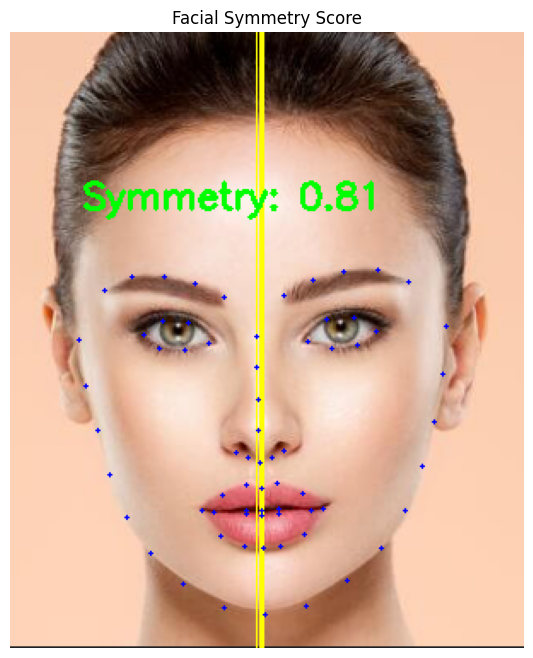

In [8]:
# Paths
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"  # Ensure this file is in your working directory
IMAGE_PATH = "./symm_face.png"  # Path to the input image

def get_symmetric_landmark_pairs():
    """
    Returns a list of tuples containing symmetric landmark indices.
    Indices are based on the 68-point landmark model.
    """
    # Define symmetric pairs manually
    symmetric_pairs = [
        (0, 16), (1, 15), (2, 14), (3, 13), (4, 12), (5, 11), (6, 10), (7, 9),
        (17, 26), (18, 25), (19, 24), (20, 23), (21, 22),
        (36, 45), (37, 44), (38, 43), (39, 42), (40, 47), (41, 46),
        (31, 35), (32, 34),
        (48, 54), (49, 53), (50, 52),
        (60, 64), (61, 63),  # Outer and inner eyebrows
        (67, 65)  # Jawline (if applicable)
    ]
    return symmetric_pairs

def calculate_symmetry_score(landmarks, symmetric_pairs, midline_x):
    """
    Calculate the symmetry score based on direct comparison of corresponding landmarks.

    Args:
        landmarks (np.ndarray): Array of landmark points (68, 2).
        symmetric_pairs (list): List of tuples containing symmetric landmark indices.
        midline_x (float): The x-coordinate of the midline.

    Returns:
        float: Symmetry score between 0 and 1.
    """
    deviations = []

    for (left_idx, right_idx) in symmetric_pairs:
        left_point = landmarks[left_idx]
        right_point = landmarks[right_idx]

        # Calculate the expected symmetric point of the left point
        expected_right_x = 2 * midline_x - left_point[0]
        expected_right_point = np.array([expected_right_x, left_point[1]])

        # Calculate the Euclidean distance between the actual right point and the expected symmetric point
        distance = np.linalg.norm(right_point - expected_right_point)
        deviations.append(distance)

    # Normalize deviations by interocular distance
    left_eye_center = np.mean(landmarks[36:42], axis=0)
    right_eye_center = np.mean(landmarks[42:48], axis=0)
    interocular_distance = np.linalg.norm(left_eye_center - right_eye_center)

    normalized_deviations = [d / interocular_distance for d in deviations]

    # Compute the average deviation
    avg_deviation = np.mean(normalized_deviations)

    # Convert to symmetry score
    # Assuming max normalized deviation is around 0.3 for imperfect symmetry
    # Adjust the scaling factor as needed based on empirical observations
    symmetry_score = 1 - min(avg_deviation / 0.3, 1)

    return symmetry_score

def main():
    # Initialize Dlib's face detector (HOG-based) and the facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(PREDICTOR_PATH)

    # Load the image using OpenCV
    image = cv2.imread(IMAGE_PATH)
    if image is None:
        raise ValueError(f"Image not found at {IMAGE_PATH}")

    # Create a copy of the image to draw on
    output_image = image.copy()

    # Convert the image to grayscale as the detector expects gray images
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = detector(gray)

    print(f"Number of faces detected: {len(faces)}")

    if len(faces) == 0:
        print("No faces detected in the image.")
        return

    # Get symmetric landmark pairs
    symmetric_pairs = get_symmetric_landmark_pairs()

    # Iterate over each detected face
    for idx, face in enumerate(faces):
        # Predict facial landmarks for the face region
        landmarks = predictor(gray, face)
        landmarks_np = np.array([[p.x, p.y] for p in landmarks.parts()])

        # Define the midline based on the nose tip's x-coordinate
        nose_tip = landmarks_np[30]
        left_eye_center = np.mean(landmarks_np[36:42], axis=0)
        right_eye_center = np.mean(landmarks_np[42:48], axis=0)
        eyes_midpoint = (left_eye_center + right_eye_center) / 2

        # Calculate the slope and intercept of the dividing line (optional visualization)
        delta_y = eyes_midpoint[1] - nose_tip[1]
        delta_x = eyes_midpoint[0] - nose_tip[0]
        if delta_x == 0:
            slope = 1e6  # Arbitrary large number to represent a vertical line
        else:
            slope = delta_y / delta_x
        intercept = nose_tip[1] - slope * nose_tip[0]

        # Calculate intersection points for drawing the line
        height, width = output_image.shape[:2]
        if slope != 1e6:
            x1, y1 = 0, int(intercept)
            x2, y2 = width, int(slope * width + intercept)
        else:
            x1, y1 = int(nose_tip[0]), 0
            x2, y2 = int(nose_tip[0]), height

        # Draw the dividing line (optional visualization)
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 255), 2)

        # Compute symmetry score using the vertical midline (nose tip x-coordinate)
        symmetry = calculate_symmetry_score(landmarks_np, symmetric_pairs, midline_x=nose_tip[0])

        # Display the symmetry score on the image
        cv2.putText(output_image, f"Symmetry: {symmetry:.2f}",
                    (face.left(), face.top() - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # Optional: Draw facial landmarks
        for (x, y) in landmarks_np:
            cv2.circle(output_image, (x, y), 1, (255, 0, 0), -1)

    # Convert the output image from BGR to RGB for correct color display in Matplotlib
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Create a Matplotlib figure to display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(output_image_rgb)
    plt.title("Facial Symmetry Score")
    plt.axis('off')  # Hide the axis for a cleaner look
    plt.show()

if __name__ == "__main__":
    main()
